In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Loading Data and Taking a Quick Look:

In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

**Look at the datasets** to get an idea of what the data looks like:

**head()** method returns the top five rows in the dataset.

*Each row here represents one passenger.*

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


There are 10 columns (attributes) in the training dataset:
* **PassengerId**: Unique ID for each passenger.
* **Survived**: 0 = No, 1 = Yes.
* **Pclass**: Ticket class (1, 2, or 3).
* **Name**: Name of the passenger.
* **Sex**: Gender of the passenger.
* **Age**: Age in years.
* **SibSp**: Number of siblings/spouses aboard.
* **Parch**: Number of parents/children aboard.
* **Fare**: Ticket fare.
* **Embarked**: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**info()** method returns the total number of rows, and each attribute's type and number of non-null values.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*There are 891 entries in the dataset which means it is very small by Machine Learning standards.*

*Notice that Age has only 714 non-null values, meaning that 177 passengers are missing this feature.*

**describe()** method returns a summary of the numerical attributes.

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*The count, mean, min, and max rows are self-explanatory.*

*Note that the null values are ignored (so, for example, count of Age is 714, not 891).*

*The std row shows the standard deviation (which measures how dispersed the values are).*

*The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls.*

*For example, 25% of the passengers have a Fare value of less than ~7, while 50% of less than ~14 and 75% of less than ~31. These are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).*

# Data Exploration and Preprocessing:

**Store** 'PassengerId':

In [7]:
PassengerId = df_test['PassengerId']

**Drop** 'PassengerId' **column** as it is not necessary for the model:

In [8]:
df_train = df_train.drop('PassengerId', axis=1)
df_test = df_test.drop('PassengerId', axis=1)

***Why axis=1?***
 
*When axis is set to 1 it denotes that the action is performed in column(s).*

Check the **percentage of missing values** in each category of the dataset:

In [9]:
round(df_train.isnull().sum() / len(df_train) * 100, 2).sort_values(ascending=False)

Cabin       77.10
Age         19.87
Embarked     0.22
Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
dtype: float64

In [10]:
round(df_test.isnull().sum() / len(df_test) * 100, 2).sort_values(ascending=False)

Cabin       78.23
Age         20.57
Fare         0.24
Pclass       0.00
Name         0.00
Sex          0.00
SibSp        0.00
Parch        0.00
Ticket       0.00
Embarked     0.00
dtype: float64

**Most Machine Learning algorithms cannot work with missing features!**

There are three options:
* **Get rid of the corresponding passengers.**
* **Get rid of the whole attribute.**
* **Set the values to some value** (zero, the mean, the median, etc.)

**dropna()** method gets rid of the corresponding passengers.

**drop()** method gets rid of the whole attribute. 

**Fill missing Age values** with the **median** age:

In [11]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

/tmp/ipykernel_17/1634261788.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
/tmp/ipykernel_17/1634261788.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

***Why inplace=True?***

*The data is changed inplace and the action returns nothing. Inplace=False returns a copy of the object*

**Fill missing Embarked values** with the **mode**:

In [12]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_17/3833210086.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)


**Fill missing Fare values** with the **mean**:

In [13]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

/tmp/ipykernel_17/1576205081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)


With **so many missing values (more than 50%)** in the 'Cabin' column, trying to fill in this data would likely introduce noise or unreliable information into your analysis. We prefer to drop it:

In [14]:
#df_train.drop(columns=['Cabin'], inplace=True)

**Why we don't use it?** 'Cabin' might be important (having or not having a cabin, or the cabin category might influence survival chances).

# Exploratory Data Analysis (EDA):

**hist()** method returns a histogram plot for each numerical attribute.

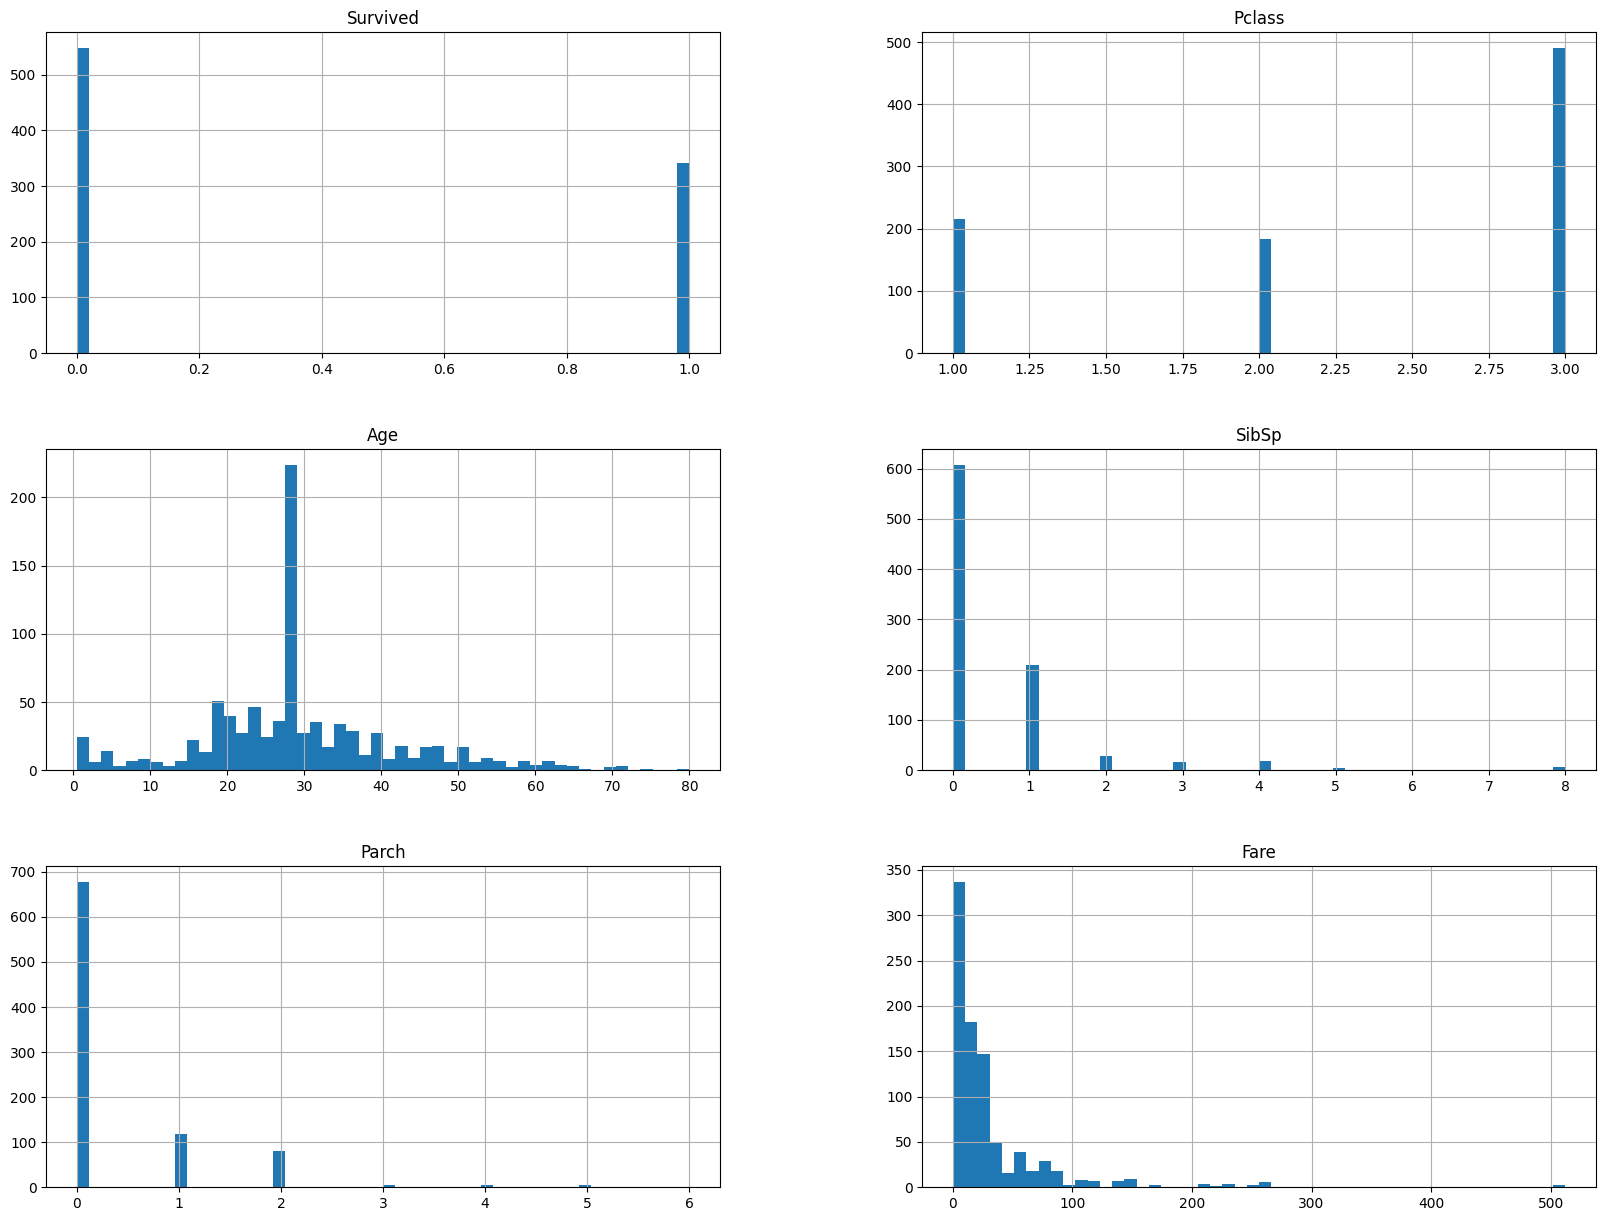

In [15]:
import matplotlib.pyplot as plt

df_train.hist(bins=50, figsize=(20, 15))
plt.show()

*A histogram is another quick way to get a feel of the type of data we are dealing with.*

**Plot barplots** for survival based on gender and class:

**barplot()** method returns a barplot for our dataset.

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

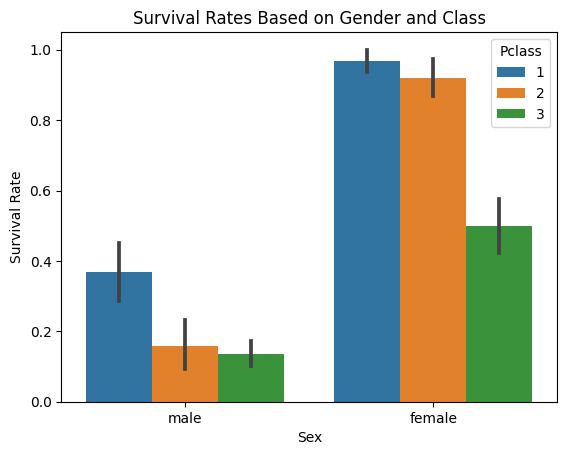

In [16]:
import seaborn as sns 

sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

# Data Exploration and Preprocessing (again):

**Most Machine Learning algorithms prefer to work with numbers!**

Use **Label Encoding** for 'Age', which converts "male" and "female" into 0 and 1.

In [17]:
from sklearn.preprocessing import LabelEncoder

df_train['Sex'] = LabelEncoder().fit_transform(df_train['Sex'])
df_test['Sex'] = LabelEncoder().fit_transform(df_test['Sex'])

**One-Hot Encoding** for categorical data (dummy variables):

In [18]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Embarked'], drop_first=True)

In [19]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,False,False
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,True
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,False,True


In [20]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,True,False
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,False,True
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,True,False
3,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,False,True
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,False,True


One-Hot Encoding creates separate binary columns for each category ("S", "C", "Q").
* **Embarked_S:** 1 if the passenger embarked at Southampton, 0 otherwise
* **Embarked_C:** 1 if the passenger embarked at Cherbourg, 0 otherwise
* **Embarked_Q:** 1 if the passenger embarked at Queenstown, 0 otherwise

*PS: One-Hot Encoding is better here because it prevents the model from assuming any ordinal relationship between the categories (e.g., S > C > Q).*

# Feature Engineering:

**Feature** that shows **whether a passenger had a cabin or not**:

In [21]:
df_train['HasCabin'] = df_train['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
df_test['HasCabin'] = df_test['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

**Challenge:** Understand what **.apply(lambda x: )** does and try to implement it with a for loop and if-else check!

**Feature** that shows **cabin category:**

In [22]:
df_train['CabinCat'] = df_train.Cabin.apply(lambda x: str(x)[0])
df_test['CabinCat'] = df_test.Cabin.apply(lambda x: str(x)[0])

Compare survival rate by cabin category:

In [23]:
pd.pivot_table(df_train,index='Survived',columns='CabinCat', values='Name', aggfunc='count')

CabinCat,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


**Feature** that shows **family size** of passenger:

In [24]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

**Feature** that shows **if passenger is travelling alone:**

In [25]:
df_train['IsAlone'] = df_train.FamilySize.apply(lambda x: 1 if x==1 else 0)
df_test['IsAlone'] = df_test.FamilySize.apply(lambda x: 1 if x==1 else 0)

**Extract title** from name and make new **feature**:

In [26]:
df_train['Title'] = df_train['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
df_test['Title'] = df_test['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

* **.str.split(','):** Splits the name into two parts (e.g., "Braund" and "Mr. Owen Harris").
* **.str[1]:** Selects the part after the comma, which contains the title.
* **.str.split('.'):** Splits this part by the period (e.g., "Mr.").
* **.str[0]:** Selects the first part before the period (e.g., "Mr").
* **.str.strip():** Removes any leading or trailing spaces.

**Drop columns** that are no longer needed:

In [27]:
df_train = df_train.drop(['Cabin','Name', 'Ticket'], axis=1)
df_test = df_test.drop(['Cabin','Name', 'Ticket'], axis=1)

PS: 'Ticket' might correlate to 'Pclass' but, at the end of the day, it is just a random number

**Bining** 'Age':

**cut()** method bins a value in categories (whose labels we choose). 

Bins are intervals (here: (0, 12], (12, 18], (18, 35], (35, 60], (60, 100])

In [28]:
df_train['AgeBin'] = pd.cut(df_train['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
df_test['AgeBin'] = pd.cut(df_test['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])

**map()** method replaces categorical labels with values we choose (most commonly numerical values).

In [29]:
df_train['AgeBin'] = df_train['AgeBin'].map({'Child': 0, 'Teenager': 1, 'Young Adult': 2, 'Adult': 3, 'Senior': 4} ).astype(int)
df_test['AgeBin'] = df_test['AgeBin'].map({'Child': 0, 'Teenager': 1, 'Young Adult': 2, 'Adult': 3, 'Senior': 4} ).astype(int)

**Mapping** 'Title':

In [30]:
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [31]:
df_test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

**replace(x, y)** method replaces item(s) x in the dataframe with item y.

In [32]:
df_train['Title'] = df_train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')

df_train['Title'] = df_train['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
df_train['Title'] = df_train['Title'].fillna(0)

df_test['Title'] = df_test['Title'].replace(['Col', 'Rev', 'Dr', 'Dona'], 'Rare')
df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')

df_test['Title'] = df_test['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
df_test['Title'] = df_test['Title'].fillna(0)

**Mapping** 'CabinCat':

In [33]:
df_train['CabinCat'].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [34]:
df_test['CabinCat'].unique()

array(['n', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [35]:
df_train['CabinCat'] = df_train['CabinCat'].map( {'n': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T':8} ).astype(int)
df_test['CabinCat'] = df_test['CabinCat'].map( {'n': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7} ).astype(int)

**Look at the datasets** again:

In [36]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,HasCabin,CabinCat,FamilySize,IsAlone,Title,AgeBin
0,0,3,1,22.0,1,0,7.2500,False,True,0,0,2,0,1.0,2
1,1,1,0,38.0,1,0,71.2833,False,False,1,3,2,0,3.0,3
2,1,3,0,26.0,0,0,7.9250,False,True,0,0,1,1,2.0,2
3,1,1,0,35.0,1,0,53.1000,False,True,1,3,2,0,3.0,2
4,0,3,1,35.0,0,0,8.0500,False,True,0,0,1,1,1.0,2


In [37]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,HasCabin,CabinCat,FamilySize,IsAlone,Title,AgeBin
0,3,1,34.5,0,0,7.8292,True,False,0,0,1,1,1,2
1,3,0,47.0,1,0,7.0000,False,True,0,0,2,0,3,3
2,2,1,62.0,0,0,9.6875,True,False,0,0,1,1,1,4
3,3,1,27.0,0,0,8.6625,False,True,0,0,1,1,1,2
4,3,0,22.0,1,1,12.2875,False,True,0,0,3,0,3,2


Find **correlation matrix** (again):

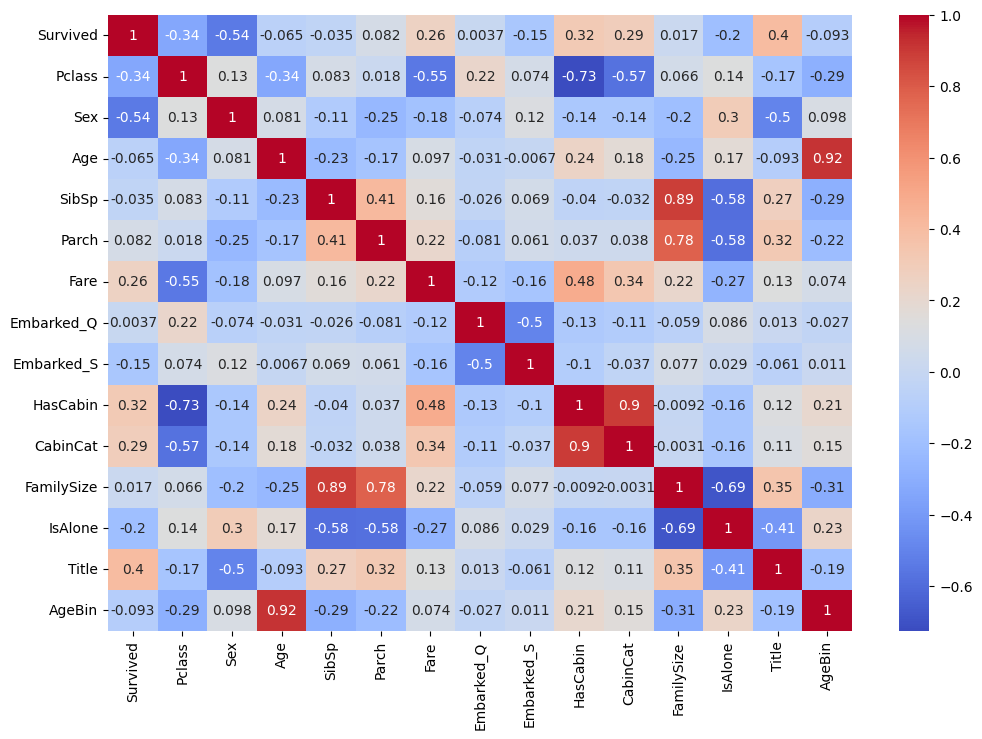

In [38]:
corr_matrix = df_train.select_dtypes(include=['float64', 'int64', 'bool']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**Drop** 'Embarked_Q' and 'FamilySize' **columns** due to their weak relation with 'Survived':

In [39]:
df_train = df_train.drop(['Embarked_Q', 'FamilySize'], axis=1)
df_test = df_test.drop(['Embarked_Q', 'FamilySize'], axis=1)

# Spliting the Data:

**Spliting** the date into **features (X)** and **target variable (y)**:

In [40]:
X = df_train.drop(['Survived'], axis=1)
y = df_train['Survived']

**Spliting** the data into a **training** and a **validation set**:

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Tuning for Logistic Regression Model:

**Most Machine Learning algorithms don't perform well when the input numerical attributes have very different scales!**

*Our dataframe is not scaled, i.e. Age ranges from 0 to 80, while the Pclass ranges from 1 to 3.*

Note that scaling the target values is generally not required.

**Scale data:**

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.fit_transform(df_test)

**Initialize the model:**

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

Define the **parameter grid** for hyperparameter tuning:

Here’s what each parameter in the grid means:

* **C**: The inverse of regularization strength; *smaller values specify stronger regularization*. Testing values over a range (e.g., [0.01, 0.1, 1, 10, 100]) allows *finding the optimal balance between model complexity and regularization*.

* **penalty**: The regularization norm to be applied. Options:

    **'l1'**: L1 regularization (lasso), which *encourages sparsity (i.e., reducing some coefficients to zero)*.
    
    **'l2'**: L2 regularization (ridge), which *penalizes large coefficients, leading to a more generalized model*.
    
* **solver**: The optimization algorithm used to find the best model parameters. Options:

    **'liblinear'**: Suitable *for small datasets*. Works with both l1 and l2 penalties.
    
    **'saga'**: Suitable *for larger datasets* and also supports both l1 and l2 penalties.

In [44]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

Perform **grid search** with cross-validation:

Explanation of each parameter:

* **estimator=lr**: This *defines the machine learning model you want to optimize*. Here, lr is a logistic regression model (LogisticRegression()). GridSearchCV will use this model as a base estimator and then train it using various combinations of hyperparameters defined in param_grid.
 
* **param_grid=param_grid**: This is a *dictionary specifying the hyperparameters* and the range of values to try for each one as seen above.

* **cv=5**: cv stands for cross-validation and specifies the number of folds for the cross-validation process. In *5-fold* cross-validation, the dataset is *split into 5 parts (or “folds”)*, and the model is *trained and validated 5 times*, each time using a different fold as the validation set and the remaining four folds for training. The *results are then averaged over all 5 folds*.

* **scoring='accuracy'**: This *specifies the evaluation metric* used to assess model performance. Here, accuracy is used.

* **n_jobs=-1**: This *specifies the number of CPU cores to use for the computation*. Setting n_jobs=-1 means that all available cores will be used in parallel, which speeds up the search, especially when the param_grid has many combinations.

In [45]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=lr, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1
)

**Fit** the model:

In [46]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

# Evaluate Model:

Retrieve the **best model**:

In [47]:
best_logreg = grid_search.best_estimator_

Make **predictions** on the **validation set**:

In [48]:
y_pred = best_logreg.predict(X_val_scaled)

Evaluate model based on **accuracy:**

In [49]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

0.7877094972067039


# Predictions:

In [50]:
test_predictions = best_logreg.predict(X_test_scaled)

# Sumbission:

In [51]:
submission = pd.DataFrame({'PassengerId': PassengerId,'Survived': test_predictions})

In [52]:
submission.to_csv('titanic_logistic_regression_submission.csv', index=False)